In [11]:
import pandas as pd
import numpy as np

In [12]:
movies = pd.read_csv('../../data/movies.csv')
ratings = pd.read_csv('../../data/ratings.csv')
links = pd.read_csv('../../data/links.csv')
tags = pd.read_csv('../../data/tags.csv')

In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [18]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [19]:
tags['userId'].nunique()

58

In [20]:
ratings['userId'].nunique()

610

In [39]:
from surprise import Dataset, Reader
from surprise import SVD, SVDpp, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, SlopeOne
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [21]:
data = ratings.drop('timestamp', axis = 1)
data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [30]:
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [31]:
svd = SVD(500)

In [32]:
svd.fit(trainset)

In [42]:
preds = svd.test(testset)
accuracy.rmse(preds)

RMSE: 0.8935


0.8935461705235499

In [35]:
preds[:10]

[Prediction(uid=202, iid=2115, r_ui=3.0, est=3.8419151944685943, details={'was_impossible': False}),
 Prediction(uid=541, iid=345, r_ui=3.0, est=3.6787987658685704, details={'was_impossible': False}),
 Prediction(uid=469, iid=2065, r_ui=4.0, est=3.148916486713622, details={'was_impossible': False}),
 Prediction(uid=414, iid=2411, r_ui=3.0, est=3.291690133209579, details={'was_impossible': False}),
 Prediction(uid=480, iid=4701, r_ui=2.5, est=3.389263302577212, details={'was_impossible': False}),
 Prediction(uid=448, iid=454, r_ui=3.0, est=2.6053221832477043, details={'was_impossible': False}),
 Prediction(uid=307, iid=2169, r_ui=1.5, est=3.101334606261994, details={'was_impossible': False}),
 Prediction(uid=604, iid=185, r_ui=4.0, est=3.4119073452570565, details={'was_impossible': False}),
 Prediction(uid=10, iid=51705, r_ui=4.5, est=3.8259979149175134, details={'was_impossible': False}),
 Prediction(uid=177, iid=1252, r_ui=4.0, est=3.9695031587746765, details={'was_impossible': False}

In [40]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.866785,413.464885,14.097466
BaselineOnly,0.877280,0.215042,0.354634
SVD,0.881523,4.731809,0.357419
KNNBaseline,0.882364,0.371136,3.279861
KNNWithZScore,0.903087,0.272314,2.832555
KNNWithMeans,0.904451,0.186357,2.671215
SlopeOne,0.909538,3.726568,9.392291
NMF,0.933199,6.192310,0.305965
CoClustering,0.949730,2.793200,0.298082


In [44]:
svdpp= SVDpp()
svdpp.fit(trainset)

In [45]:
predictions = svdpp.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8638


0.8637950824786944

<AxesSubplot:>

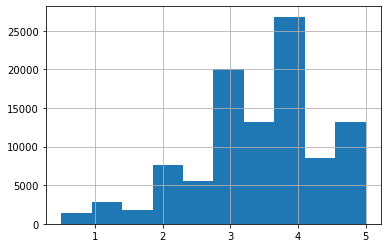

In [46]:
ratings['rating'].hist()

In [48]:
ratings['userId'].value_counts(ascending=True)

442      20
431      20
569      20
595      20
406      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: userId, Length: 610, dtype: int64

In [51]:
ratings['movieId'].value_counts(ascending=True)

8196        1
83976       1
34800       1
100304      1
5986        1
         ... 
2571      278
593       279
296       307
318       317
356       329
Name: movieId, Length: 9724, dtype: int64

In [ ]:
grou